# HW8: Ada Boost for Committee Training of Nonlinearly Separable Classifiers

Blanca Miller
STAT 760
04.12.2018

__Objective:__ Create a data set containing a positive and negative class, where the positive class is a circle inside of the negative class, a square, and train a committee of classifiers using the adaptive boosting algorithm to make random cuts in the square. A series of "linear cuts" will combine to generate a classifier for the nonlinearly separable distribution of the positive class.

A set of data, labels, and classifiers is given. The algorithm begins by setting the weights for all classifiers to 1. Then the algorithm iterates through the number of classifiers that is desired. An evaluative matrix is built given the classifier set using data and corresponding labels where the rows represent a data input and the columns represent a classifier, then
- classifier failures are recorded with a 0
- classifier successes are recorded wiht a 1

From the set of classifier, one classifier is chosen based on having the minimal weighted sum error. Then the weight for the current classifier is computed. Lastly, the weight is updated for the next classifier iteration. The hope being that the iterative adjustments will eventually lead to weight values that accurately classify the majority of the training data. This is due to the algorithm's error criterion using the exponential loss function for β > 0, which results in e^-β < e^β. Specifically, the classifier with the worst performance sees substantial increases in weight value, e^β, while classifiers with the best performance see small increase in weight value, e^-β. The functions being,
- Error = w_n e-α_m + w_e e^α_m
- dError/dα_m = 1/2 * ln(1-e_m/e_m)

__Error criterion:__ exponential loss function for β > 0 and e^-β < e^β where
- the cost of classifier failure is e^β and
- the cost of classifier success is e^-β Thus, a miss is more heavily penalized than a hit.

__References:__
R. Rojas, 2009, AdaBoost & the Super Bowl of Classifiers A Tutorial Introduction to Adaptive Boosting http://www.inf.fu-berlin.de/inst/ag-ki/rojas_home/documents/tutorials/adaboost4.pdf

__Ada Boost Algorithm:__ Ada boost is a three step algorithm that generates a robust and generalizable committee of classifiers from a given set of classifiers. The algorithm executes as follows,

1. Initialize all weights w_i = 1 

2. For the number of classifiers we want, M, we compute i = 0...M iterations:
    (a) Fit a classifier, k_m, to the training data 

    (b) Computer the weighted sum error: w_e = sum w_i^(m)
         
    (c) Set the weight α_m for the chosen weak classifier to α_m = 1/2 * ln((1-e_m)/e_m) where em = W_e/W , this is the derivative of the error function: Error: w_n * e-α_m + w_e * e^α_m & dError/dα_m = 1/2 * ln(1-e_m/e_m)
    
    (d) Update the weight of the data points for the next iteration. If k_m(x_i) is: Miss: w_i^(m+1) = w_i^(m)*e^α_m = w_i^(m)*sqrt((1-e_m)/e_m) & Hit: w_i^(m+1) = w_i^(m)*e^-α_m = w_i^(m)*sqrt(e_m/(1-e_m))
       

In [1]:
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles

### Construct Datasets: Positive & Negative Classes

In [3]:
X_train, y_train = make_gaussian_quantiles(cov=2., n_samples=300, n_features=2,
                               n_classes=2, random_state=1)
X_test, y_test = make_gaussian_quantiles(cov=2., n_samples=300, n_features=2,
                               n_classes=2, random_state=2)

### Print Data Set Contents for Verification

In [6]:
print('Training data: {}'.format(X_train.shape))
print('Training labels: {}'.format(y_train.shape))
print('Testing data: {}'.format(X_test.shape))
print('Testing labels: {}'.format(y_test.shape))

Training data: (300, 2)
Training labels: (300,)
Testing data: (300, 2)
Testing labels: (300,)


In [15]:
print('X train: \n{}'.format(X_train[0:5,0:2]))
print('y train: \n{}\n'.format(y_train[0:5]))
print('X test: \n{}'.format(X_test[0:5,0:2]))
print('y test: \n{}'.format(y_test[0:5]))

X train: 
[[ -2.67496068e-03  -1.97511955e+00]
 [  2.69995268e-01   2.97020930e+00]
 [ -1.73793024e-01  -1.32337783e+00]
 [ -8.50164101e-01   7.86406700e-01]
 [ -7.71841230e-01  -2.81199202e-01]]
y train: 
[1 1 0 0 0]

X test: 
[[-0.23187846  0.5255531 ]
 [ 2.46329442 -0.63286181]
 [-0.79831427 -2.95260563]
 [ 1.00700665 -2.54659705]
 [-0.380504    3.15562918]]
y test: 
[0 1 1 1 1]


In [16]:
type(X_train)

numpy.ndarray

### Plot Training & Testing Data Sets

In [19]:
x_min_train, x_max_train = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min_train, y_max_train = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
x_min_test, x_max_test = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min_test, y_max_test = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1

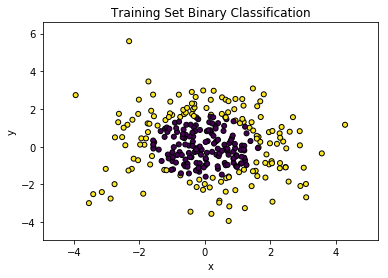

In [20]:
# plot training points
plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train, s=25, edgecolor='k')
plt.xlim(x_min_train, x_max_train)
plt.ylim(y_min_train, y_max_train)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Training Set Binary Classification')
plt.show()

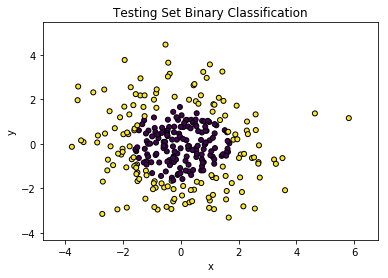

In [21]:
# plot testing points
plt.scatter(X_test[:, 0], X_test[:, 1], marker='o', c=y_test, s=25, edgecolor='k')
plt.xlim(x_min_test, x_max_test)
plt.ylim(y_min_test, y_max_test)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Testing Set Binary Classification')
plt.show()